In [ ]:
!pip install -U pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 2)
from IPython.core.pylabtools import figsize
import missingno as mn
import re


In [2]:
rest_train = pd.read_csv('RestoInfo.csv')
rest_train.head()

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,46019,Unique Brew Cafe Resto,No,No,NaN,0,Indiranagar,Quick Bites,NaN,Fast Food,200,[],[],Dine-out,Old Airport Road
1,28849,Jayanthi Sagar,No,No,3.1 /5,21,Koramangala 5th Block,Quick Bites,NaN,"South Indian, North Indian, Chinese",200,"[('Rated 2.0', ""RATEDn Works only because it'...",[],Dine-out,Koramangala 4th Block
2,19855,Rock Stone Ice Cream Factory,Yes,No,4.0/5,131,BTM,Dessert Parlor,"Icecream Cake, Brownie, Waffles, Chocolate Ice...",Ice Cream,230,"[('Rated 4.0', ""RATEDn Ice creams are really ...","['Midnight Indulgence Cake', 'Butterscotch Mel...",Delivery,Jayanagar
3,35188,Punjabi by Nature 2.0,No,No,4.2 /5,3236,BTM,"Casual Dining, Microbrewery","Paneer Tikki, Mutton Raan, Mango Margarita, Cr...",North Indian,NaN,"[('Rated 3.0', ""RATEDn It has a beautiful amb...",[],Delivery,Koramangala 7th Block
4,7070,Rayalaseema Chefs,Yes,Yes,3.9/5,225,Marathahalli,Casual Dining,"Bamboo Chicken, Butter Naan, Mutton Biryani, P...","North Indian, Biryani, Andhra, Chinese",800,"[('Rated 5.0', 'RATEDn Had Good experience wi...",[],Delivery,Brookefield


In [3]:
rest_train.shape

(2069, 15)

In [4]:
# rename Unnamed column to rest_id
rest_train = rest_train.rename(columns= {'Unnamed: 0': 'rest_id'})

In [5]:
rest_train.columns

Index(['rest_id', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
rest_train.shape

(2069, 15)

In [7]:
rest_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rest_id                      2069 non-null   int64 
 1   name                         2069 non-null   object
 2   online_order                 2069 non-null   object
 3   book_table                   2069 non-null   object
 4   rate                         1770 non-null   object
 5   votes                        2069 non-null   int64 
 6   location                     2069 non-null   object
 7   rest_type                    2052 non-null   object
 8   dish_liked                   962 non-null    object
 9   cuisines                     2069 non-null   object
 10  approx_cost(for two people)  2053 non-null   object
 11  reviews_list                 2069 non-null   object
 12  menu_item                    2069 non-null   object
 13  listed_in(type)              2069

In [8]:
rest_train.dtypes

rest_id                         int64
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [9]:
# gives the count, mean, standard deviation of numerical column, here votes
rest_train.describe() 

,rest_id,votes
count,2069.000000,2069.000000
mean,25840.654422,276.048333
std,14877.311956,673.916908
min,27.000000,0.000000
25%,12561.000000,7.000000
50%,26193.000000,43.000000
75%,38902.000000,210.000000
max,51643.000000,7854.000000


In [10]:
# check for any missing value
rest_train.isna().any()

rest_id                        False
name                           False
online_order                   False
book_table                     False
rate                            True
votes                          False
location                       False
rest_type                       True
dish_liked                      True
cuisines                       False
approx_cost(for two people)     True
reviews_list                   False
menu_item                      False
listed_in(type)                False
listed_in(city)                False
dtype: bool

In [11]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [12]:
missing_values_table(rest_train).head(14)

Your selected dataframe has 15 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
dish_liked,1107,53.5
rate,299,14.5
rest_type,17,0.8
approx_cost(for two people),16,0.8


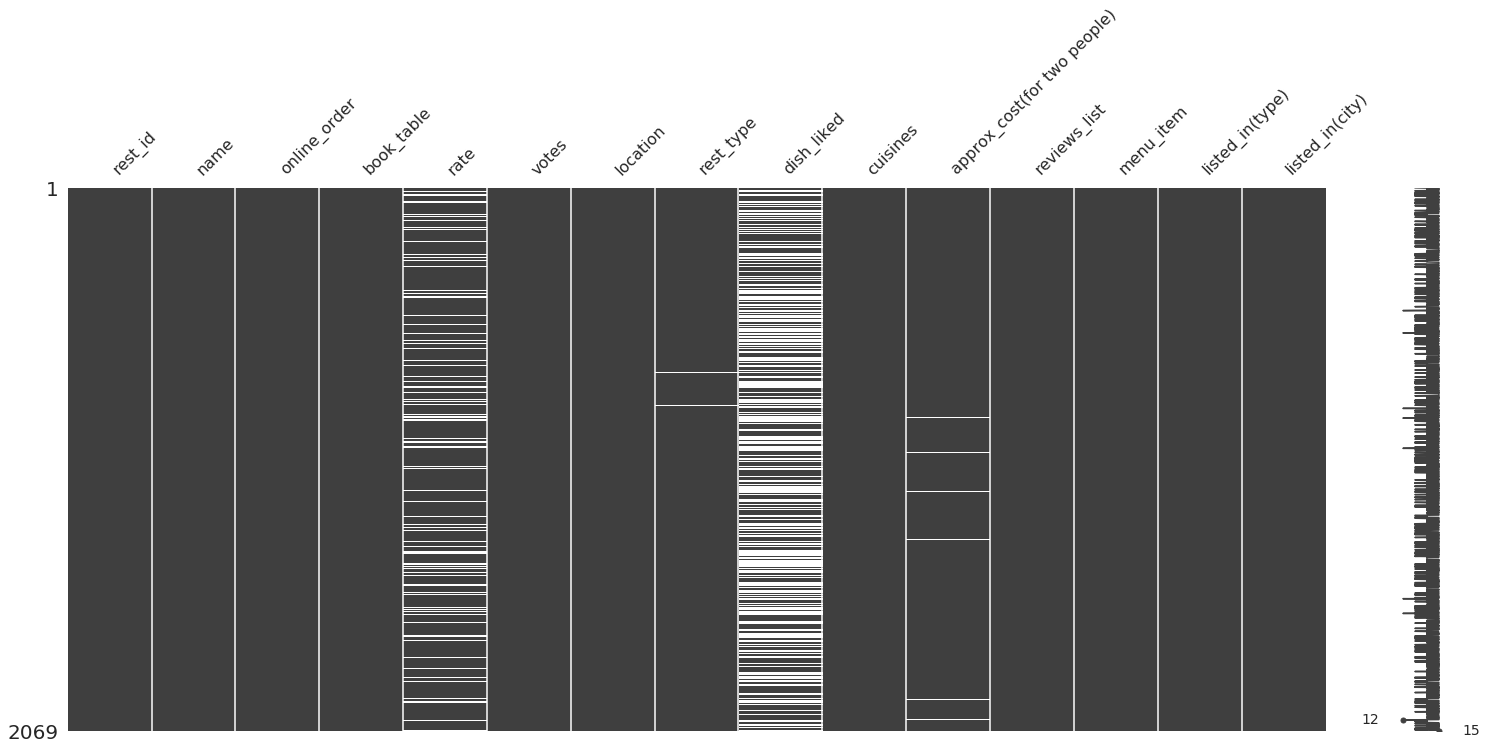

In [13]:
mn.matrix(rest_train)

## From above figure it's clear that there are 4 columns which has missing value

In [14]:
# cant fill the nulls with mean because the columns does not have pure integer value
rest_train.fillna(method='ffill', inplace=True)

In [15]:
missing_values_table(rest_train).head()           #checking if there are any other missing value

Your selected dataframe has 15 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
dish_liked,2,0.1
rate,1,0.0


In [16]:
# dropping the null values since their percentage is less
rest_train.dropna(inplace=True)
missing_values_table(rest_train)        

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


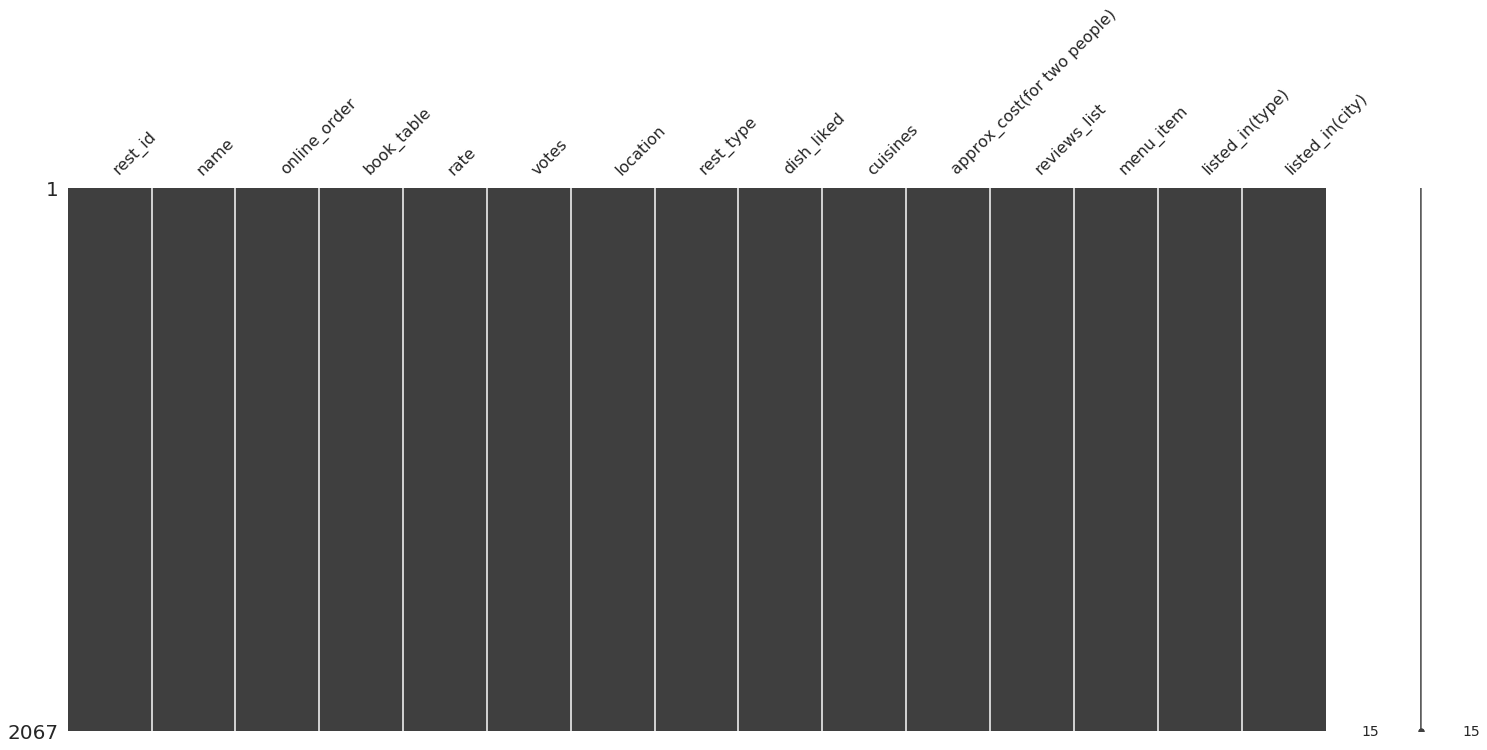

In [17]:
mn.matrix(rest_train)

## No null values now

In [18]:
rest_train.shape

(2067, 15)

In [19]:
rest_train.columns

Index(['rest_id', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [20]:
# checking for any duplicate values
rest_train['name'].duplicated().sum()

404

The columns review list and menu item were not pure lists. So I converted them to list 

In [21]:
# function to convert the columns review list and menu item to list

def replacenth(string, sub, wanted, n):
    where = [m.start() for m in re.finditer(sub, string)][n-1]
    before = string[:where]
    after = string[where:]
    after = after.replace(sub, wanted, 1)
    newString = before + after
    return newString

def fix_remover_eval(remover):
    bad_quotes = []
    for i,match in enumerate(re.finditer(r"\'", remover)):
        span_start, span_end = match.span()
        before = remover[span_start-2:span_start]
        after = remover[span_end:span_end+1]
        if before == '[(' or before == ' (' or before == ', ':
            continue
        if after == "," or after == ")":
            continue
        else:
            bad_quotes.append((i, match.group(0)))

    for i,q in bad_quotes:
        remover = replacenth(remover, "\'", "\\'", i+1)

    bad_quotes = []
    for i,match in enumerate(re.finditer(r'\"', remover)):
        span_start, span_end = match.span()
        before = remover[span_start-2:span_start]
        after = remover[span_end:span_end+1]
        if before == '[(' or before == ' (' or before == ', ':
            continue
        if after == "," or after == ")" or after == ', ':
            continue
        else:
            bad_quotes.append((i, match.group(0)))

    for i,q in bad_quotes:
        remover = replacenth(remover, '\"', '\\"', i+1)
    return eval(remover)


In [22]:
def get_eval(t):
    try:
        return fix_remover_eval(t)
    except:
        return t

In [251]:
def float_converter(x):
    try:
        all_floats = re.findall(r'[\.\d]+', x)
        if all_floats:
            return float(all_floats[0])
        else:
            return -1
    except:
        return -1
    

rest_train['reviews_list_evaled'] = rest_train['reviews_list'].apply(get_eval)
rest_train['menu_item_evaled'] =rest_train['menu_item'].apply(eval)
rest_train['rate'] = rest_train['rate'].apply(float_converter)

In [252]:
rest_train = rest_train[rest_train['reviews_list_evaled'].apply(type) != str]

In [253]:
rest_train.head()

,rest_id,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),reviews_list_evaled,menu_item_evaled,cuisines_split,dish_liked_split
2,19855,Rock Stone Ice Cream Factory,Yes,No,4.0,131,BTM,Dessert Parlor,"Icecream Cake, Brownie, Waffles, Chocolate Ice...",Ice Cream,230,"[('Rated 4.0', ""RATEDn Ice creams are really ...","['Midnight Indulgence Cake', 'Butterscotch Mel...",Delivery,Jayanagar,"[(Rated 4.0, RATEDn Ice creams are really tas...","[Midnight Indulgence Cake, Butterscotch Melody...",[Ice Cream],"[Icecream Cake, Brownie, Waffles, Chocolate..."
3,35188,Punjabi by Nature 2.0,No,No,4.2,3236,BTM,"Casual Dining, Microbrewery","Paneer Tikki, Mutton Raan, Mango Margarita, Cr...",North Indian,230,"[('Rated 3.0', ""RATEDn It has a beautiful amb...",[],Delivery,Koramangala 7th Block,"[(Rated 3.0, RATEDn It has a beautiful ambian...",[],[North Indian],"[Paneer Tikki, Mutton Raan, Mango Margarita,..."
4,7070,Rayalaseema Chefs,Yes,Yes,3.9,225,Marathahalli,Casual Dining,"Bamboo Chicken, Butter Naan, Mutton Biryani, P...","North Indian, Biryani, Andhra, Chinese",800,"[('Rated 5.0', 'RATEDn Had Good experience wi...",[],Delivery,Brookefield,"[(Rated 5.0, RATEDn Had Good experience with ...",[],"[North Indian, Biryani, Andhra, Chinese]","[Bamboo Chicken, Butter Naan, Mutton Biryani..."
5,32050,Bistro Oui,Yes,Yes,4.1,402,Koramangala 5th Block,"Cafe, Bar","Veg Burger, Pork Ribs, Pizza, Chicken Sandwich...","Cafe, Continental, Salad, Steak","1,200","[('Rated 4.0', 'RATEDn Funny & TastynnWe visi...",[],Pubs and bars,Koramangala 5th Block,"[(Rated 4.0, RATEDn Funny & TastynnWe visited...",[],"[Cafe, Continental, Salad, Steak]","[Veg Burger, Pork Ribs, Pizza, Chicken Sand..."
6,9918,Bhavani Upahara,Yes,No,3.3,9,Bannerghatta Road,Quick Bites,"Veg Burger, Pork Ribs, Pizza, Chicken Sandwich...",South Indian,250,"[('Rated 5.0', 'RATEDn best north Karnataka f...",[],Delivery,BTM,"[(Rated 5.0, RATEDn best north Karnataka food...",[],[South Indian],"[Veg Burger, Pork Ribs, Pizza, Chicken Sand..."


In [254]:
rest_train.shape

(2065, 19)

In [255]:
count_rating = rest_train.rate.value_counts()
count_rating

 3.8    186
 3.7    177
 3.9    160
 4.0    157
 3.6    152
 4.1    150
 3.5    130
 3.4    109
 3.3    105
 4.2    104
-1.0    101
 4.3     88
 3.2     84
 3.1     70
 4.4     64
 3.0     57
 2.9     43
 2.8     43
 4.5     29
 2.6     14
 2.7     13
 4.6     11
 2.2      3
 2.5      3
 4.8      3
 2.3      2
 2.1      2
 4.7      2
 1.8      1
 4.9      1
 2.4      1
Name: rate, dtype: int64

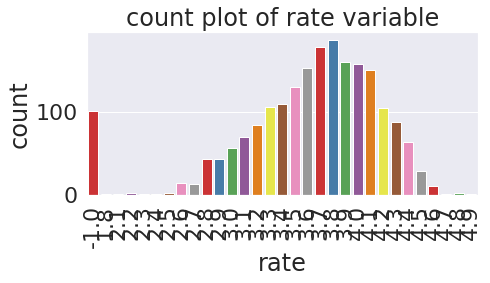

In [267]:
# plot the count of rating
%matplotlib inline
plt.rcParams['figure.figsize'] = 7,3
chart = sns.countplot(rest_train['rate'],palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('count plot of rate variable')
plt.show()

## Inference 1:
## From the above plot, the average rating of the restaurants is ~3.8. The rating of the majority restaurants lie between 3.2 - 4.1. Very few restaurant ~3 were rated 4.8 

## Restaurant vs Vote

In [29]:
rate_votes_name_df = rest_train.filter(['name','rate','votes'], axis=1)

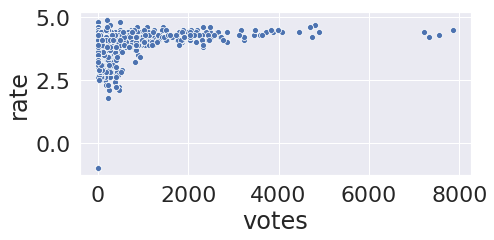

In [268]:
sns.scatterplot(x = 'votes', y = 'rate', data = rest_train)
plt.show()

# Inference 2:
# Few restaurants have more votes but rating is low. Encourage people to give rating to their restaurant.

# Few cases were found

# Famous restaurant

In [31]:
rate_votes_name_df.sort_values(by=['votes'], inplace=True, ascending=False)

In [32]:
rate_votes_name_df

,name,rate,votes
519,Prost Brew Pub,4.5 /5,7854
1931,Church Street Social,4.3/5,7544
211,Hoot,4.2 /5,7330
1950,Meghana Foods,4.4/5,7210
1008,Empire Restaurant,4.4/5,4884
...,...,...,...
1789,Richbite Catering,4.2 /5,0
1788,Baker's Treat,4.2 /5,0
429,Lunch & Munch,3.3/5,0
428,Amma Family Restaurant,3.3/5,0


## Inference 2:
## The restaurant "Prost Brew Pub" has majority votes and has a good rating

In [161]:
# rest_train.name.value_counts()
row = rest_train[rest_train['name'] == 'Prost Brew Pub'].iloc[0]

In [162]:
row

rest_id                                                                    29207
name                                                              Prost Brew Pub
online_order                                                                  No
book_table                                                                   Yes
rate                                                                      4.5 /5
votes                                                                       7854
location                                                   Koramangala 4th Block
rest_type                                                      Pub, Microbrewery
dish_liked                     Mango Cider, Cajun Potato, Nachos, Salads, Piz...
cuisines                              American, Continental, North Indian, Salad
approx_cost(for two people)                                                1,800
reviews_list                   [('Rated 3.0', "RATEDn  Was here on a Sunday n...
menu_item                   

## Restaurant Type

In [305]:
rest_train['rest_type_split'] = rest_train['rest_type'].map(lambda x: x.split(', '))
grouped_rest_types = rest_train.explode('rest_type_split').groupby(['location', 'rest_type_split']).agg({"rate": "mean", "name": "count"})
grouped_rest_types[
    (grouped_rest_types['name'] < 3) & (grouped_rest_types['rate'] > 4)].reset_index()

,location,rest_type_split,rate,name
0,BTM,Bar,4.20,2
1,BTM,Mess,4.20,1
2,Banashankari,Dessert Parlor,4.15,2
3,Bannerghatta Road,Beverage Shop,4.40,1
4,Bannerghatta Road,Pub,4.30,2
5,Basaveshwara Nagar,Casual Dining,4.10,2
6,Basaveshwara Nagar,Delivery,4.10,1
7,Bellandur,Bar,4.25,2
8,Bellandur,Pub,4.20,1
9,Brookefield,Bar,4.10,2


## Inference 3:

## Few restaurants have good rating but has less votes. Probably because not many people have had food from these restaurants. Advertising these restaurants can help to increase their sales.

# Add more of these restaurant types in these location

In [281]:
rest_type_df = rest_train[['name','rate','votes','rest_type_split']]

In [282]:
rest_type_df.sort_values(by=['votes'], inplace=True, ascending=False)

/home/rashi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [283]:
rest_type_df

,name,rate,votes,rest_type_split
519,Prost Brew Pub,4.5,7854,"[Pub, Microbrewery]"
1931,Church Street Social,4.3,7544,[Lounge]
211,Hoot,4.2,7330,"[Microbrewery, Pub]"
1950,Meghana Foods,4.4,7210,[Casual Dining]
1008,Empire Restaurant,4.4,4884,[Casual Dining]
...,...,...,...,...
1789,Richbite Catering,4.2,0,[Delivery]
1788,Baker's Treat,4.2,0,"[Bakery, Dessert Parlor]"
429,Lunch & Munch,3.3,0,[Delivery]
428,Amma Family Restaurant,3.3,0,[Quick Bites]


In [306]:
# # joint plot for rates and votes
# %matplotlib inline
# chart = sns.scatterplot(x = 'rest_type_split', 
#                         y = 'votes', data = rest_train.explode('rest_type_split'), color='g')
# # chart.set_xticklabels(rotation=45)
# # plt.title('count plot of rate variable')
# plt.xticks(rotation=90)
# plt.show()

# restaurant distribution in location

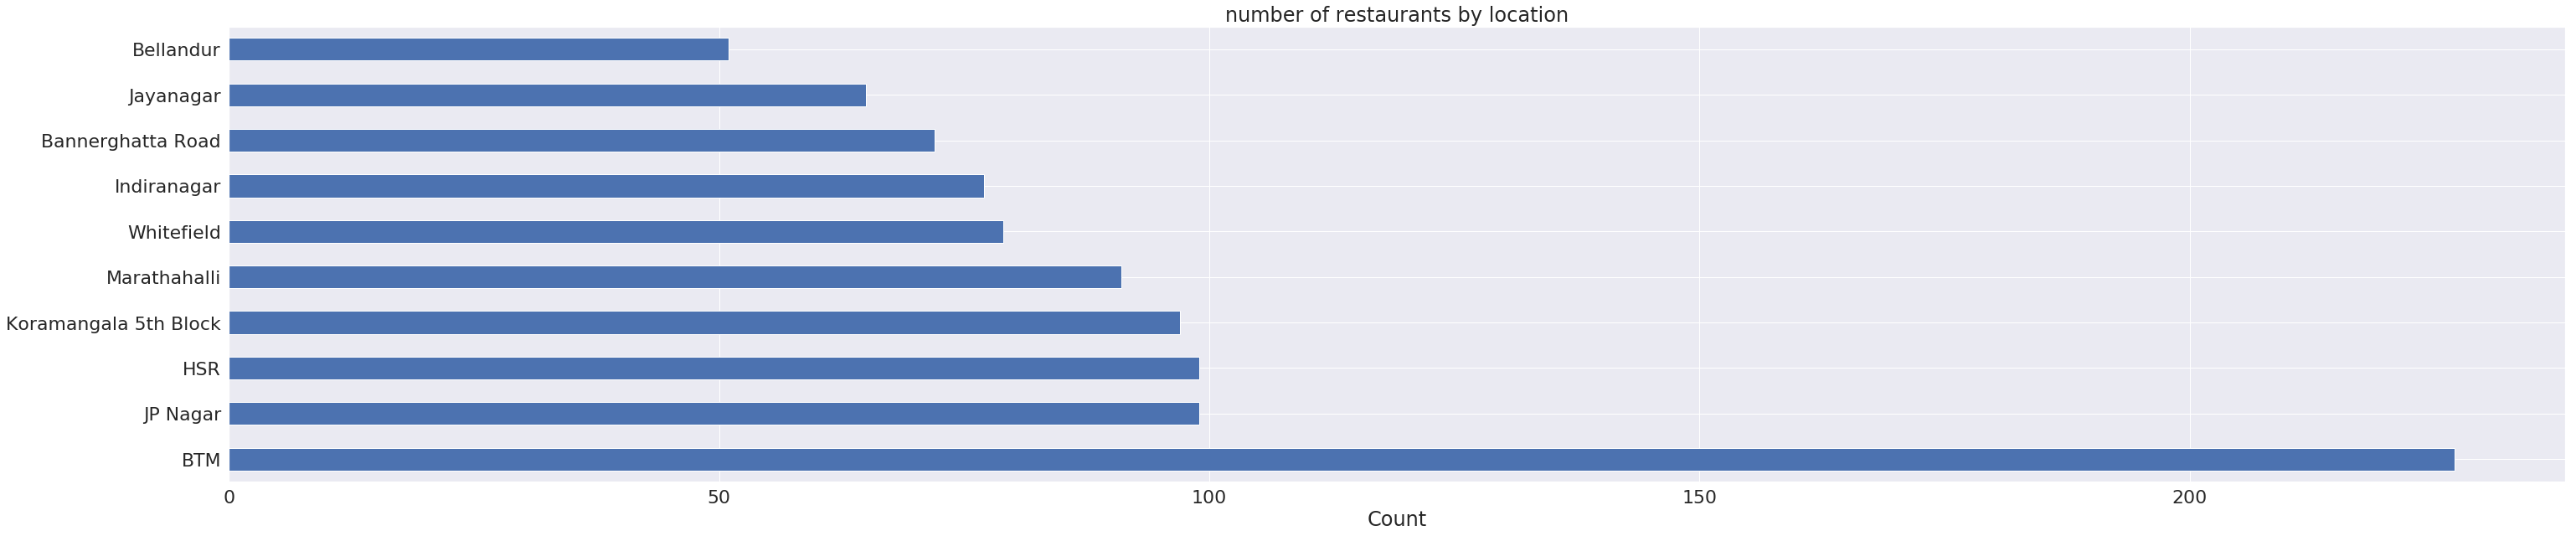

In [320]:
rest_train.location.value_counts().nlargest(10).plot(kind = 'barh')
plt.title("number of restaurants by location")
plt.xlabel("Count")
plt.show()

# Most of the restaurants are at BTM 

## Most liked dish

In [59]:
dish_liked = (rest_train['dish_liked'].map(lambda x: x.split(','))).explode().str.strip().value_counts()

In [131]:
dish_liked

Pasta                 293
Cocktails             274
Pizza                 252
Burgers               230
Biryani               191
                     ... 
Crabmeat Soup           1
Mocha Frappuccino       1
Karela Salad            1
Caramel Cheesecake      1
Tempura                 1
Name: dish_liked, Length: 1158, dtype: int64

# Cuisiness famous in location - name of restaurant


In [316]:
rest_train['cuisines_split'] = (rest_train['cuisines'].map(lambda x: x.split(',')))
rest_train['dish_liked_split'] = (rest_train['dish_liked'].map(lambda x: x.split(',')))
cusine_rest = rest_train.explode('cuisines_split').groupby(['listed_in(city)', 'cuisines_split']).agg(
    {'name': list, 'rate': list, 'votes': list})

cusine_rest[
    (cusine_rest['rate'].apply(len) < 2) & (cusine_rest['rate'].apply(lambda x: sum(x)/len(x)) > 4) & \
    (cusine_rest['votes'].apply(lambda x: x[0]) < 200)]

name   rate  votes
listed_in(city) cuisines_split                                           
BTM             Pizza                       [1441 Pizzeria]  [4.1]  [129]
Banashankari    Andhra                       [Curry Leaves]  [4.1]  [176]
Basavanagudi     French                         [Cafe Noir]  [4.5]    [0]
                 Salad                          [Cafe Noir]  [4.5]    [0]
                 Tea                              [Tea Bar]  [4.1]    [0]
...                                                     ...    ...    ...
Rajajinagar     Mangalorean                 [Meen-Da-Vanas]  [4.3]    [0]
Residency Road  Momos                           [Momo Time]  [4.1]    [0]
Sarjapur Road    Mexican        [BG's Poolside Bar & Grill]  [4.1]  [109]
                Mediterranean   [BG's Poolside Bar & Grill]  [4.1]  [109]
Whitefield       Kebab                  [New Ambur Biryani]  [4.8]    [0]

[61 rows x 3 columns]

## Inference 4:
## The restaurants which have good rating but less votes, they can choose to add those cuisines which are famous(i.e the cuisines whose rating is >4)

## Online order

In [156]:
rest_train.groupby(['name'])['online_order'].sum()

name
#FeelTheROLL                                                                                    No
1131 Bar + Kitchen                                                                              No
1441 Pizzeria                                                                               YesYes
1522 - The Pub                                                                                  No
1947                                                                                            No
                                                                                             ...  
Zodiac - Fortune Select JP Cosmos Hotel                                                        Yes
Zodiac Grills                                                                                  Yes
b CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© - Shangri-La Hotel      NoNo
eat.fit                                                                                        Yes
i-Bar

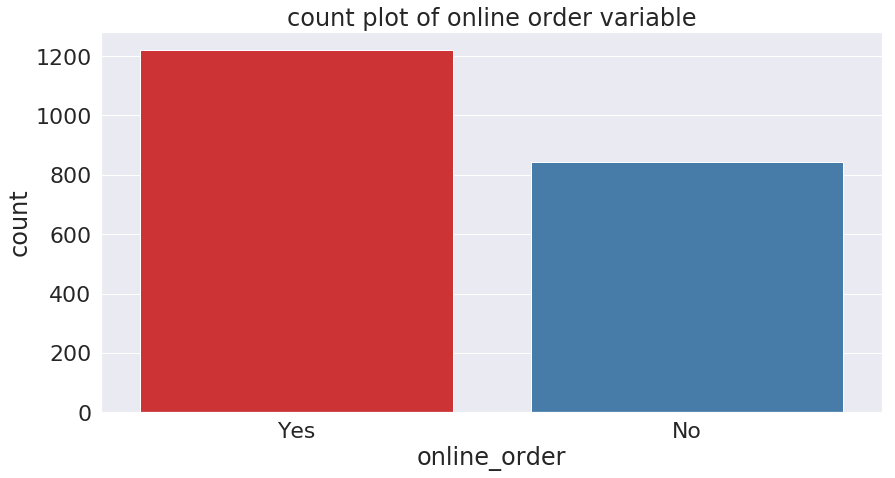

In [160]:
# plot the count of rating
plt.rcParams['figure.figsize'] = 14,7
sns.countplot(rest_train['online_order'],palette='Set1')
plt.title('count plot of online order variable')
plt.show()

In [169]:
# row = rest_train[rest_train['name'] == 'Prost Brew Pub'].iloc[0]
k = rest_train['online_order'] == 'No'

In [178]:
k.to_list()

[False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True

In [179]:
k.to_list()
count = 0
for i,val in enumerate(k):
    if val == True:
        count = count + 1
print(count," restaurants dont accept online order")

844  restaurants dont accept online order


In [333]:
rate_online_df = rest_train.filter(['online_order','rate'], axis=1)

In [334]:
rate_online_df

,online_order,rate
2,Yes,4.0
3,No,4.2
4,Yes,3.9
5,Yes,4.1
6,Yes,3.3
...,...,...
2064,Yes,3.8
2065,Yes,4.0
2066,No,4.3
2067,No,4.3


In [350]:
rest_train[(rest_train['online_order'] == 'No') & (rest_train['rate'] > 3.0)]

,rest_id,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),reviews_list_evaled,menu_item_evaled,cuisines_split,dish_liked_split,rest_type_split
3,35188,Punjabi by Nature 2.0,No,No,4.2,3236,BTM,"Casual Dining, Microbrewery","Paneer Tikki, Mutton Raan, Mango Margarita, Cr...",North Indian,230,"[('Rated 3.0', ""RATEDn It has a beautiful amb...",[],Delivery,Koramangala 7th Block,"[(Rated 3.0, RATEDn It has a beautiful ambian...",[],[North Indian],"[Paneer Tikki, Mutton Raan, Mango Margarita,...","[Casual Dining, Microbrewery]"
11,5526,Mount Blue,No,No,3.3,0,Brigade Road,"Bakery, Quick Bites","Rolls, Falafel, Biryani, Paratha","Bakery, Fast Food",300,[],[],Delivery,Brigade Road,[],[],"[Bakery, Fast Food]","[Rolls, Falafel, Biryani, Paratha]","[Bakery, Quick Bites]"
12,11285,Cool Lassi Burger,No,No,3.1,7,Koramangala 5th Block,"Beverage Shop, Quick Bites","Rolls, Falafel, Biryani, Paratha","Beverages, Fast Food, Burger",200,"[('Rated 4.5', 'RATEDn Try there sweet lassi ...",[],Dine-out,BTM,"[(Rated 4.5, RATEDn Try there sweet lassi as ...",[],"[Beverages, Fast Food, Burger]","[Rolls, Falafel, Biryani, Paratha]","[Beverage Shop, Quick Bites]"
14,31506,Lakeview Milkbar,No,No,3.8,291,Koramangala 8th Block,"Dessert Parlor, Cafe","Burgers, Pizza, Chocolate Fudge, Caramel Chees...","Desserts, Cafe, Fast Food",500,"[('Rated 3.0', 'RATEDn The ice cream served h...",[],Dine-out,Koramangala 5th Block,"[(Rated 3.0, RATEDn The ice cream served here...",[],"[Desserts, Cafe, Fast Food]","[Burgers, Pizza, Chocolate Fudge, Caramel C...","[Dessert Parlor, Cafe]"
17,10725,Vibe Club,No,No,4.1,0,BTM,Quick Bites,"Virgin Colada, Naan, Biryani, Raita, Tomato Ba...","Fast Food, Beverages",300,[],[],Dine-out,BTM,[],[],"[Fast Food, Beverages]","[Virgin Colada, Naan, Biryani, Raita, Toma...",[Quick Bites]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,37478,Pancharangi Cafe,No,No,3.8,0,Koramangala 1st Block,Quick Bites,"Fritters, Lasagne, Biryani, Fish, Pasta, Draug...",North Indian,500,[],[],Dine-out,Koramangala 7th Block,[],[],[North Indian],"[Fritters, Lasagne, Biryani, Fish, Pasta, ...",[Quick Bites]
2060,51504,New Udupi Shubh Sagar,No,No,3.9,0,Whitefield,Quick Bites,"Hyderabadi Biryani, Ginger Chicken","South Indian, North Indian, Chinese",400,[],[],Dine-out,Whitefield,[],[],"[South Indian, North Indian, Chinese]","[Hyderabadi Biryani, Ginger Chicken]",[Quick Bites]
2066,46112,Murphy's Brewhouse - The Paul Bangalore,No,Yes,4.3,2039,Domlur,"Pub, Microbrewery","Chicken Bruschetta, Tandoori Chicken, Veggie P...","Continental, North Indian, Finger Food","1,700","[('Rated 4.0', 'RATEDn Service - 4/5, Taste -...",[],Pubs and bars,Old Airport Road,"[(Rated 4.0, RATEDn Service - 4/5, Taste - 4/...",[],"[Continental, North Indian, Finger Food]","[Chicken Bruschetta, Tandoori Chicken, Veggi...","[Pub, Microbrewery]"
2067,10808,Cee Yem,No,No,4.3,0,BTM,Quick Bites,"Chicken Bruschetta, Tandoori Chicken, Veggie P...","South Indian, Kerala, North Indian",300,[],[],Dine-out,BTM,[],[],"[South Indian, Kerala, North Indian]","[Chicken Bruschetta, Tandoori Chicken, Veggi...",[Quick Bites]


## Inference 5:

## There are 713 restaurants which has rating greater than 3 but have no delivery. These restaurants can open online ordering.

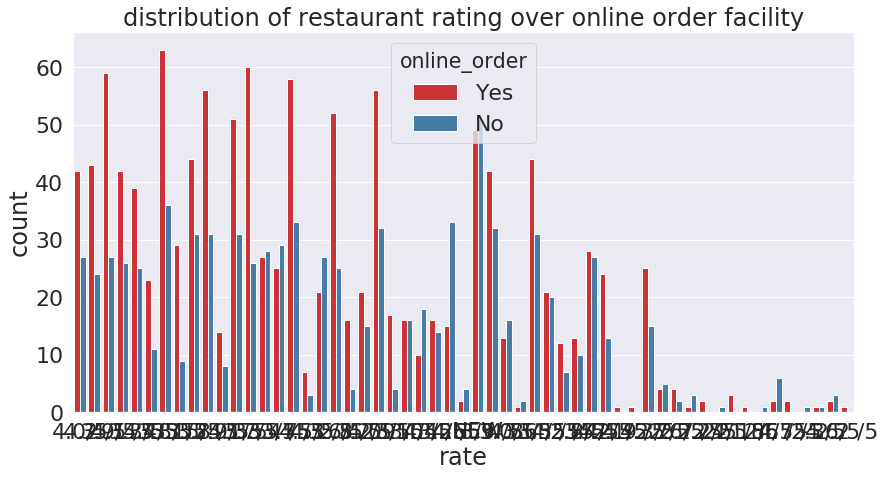

In [230]:
sns.countplot(hue = rest_train['online_order'],palette = 'Set1', x = rest_train['rate'])
plt.title("distribution of restaurant rating over online order facility")
plt.show()

## Biggest restaurant chain and best restaurant chain

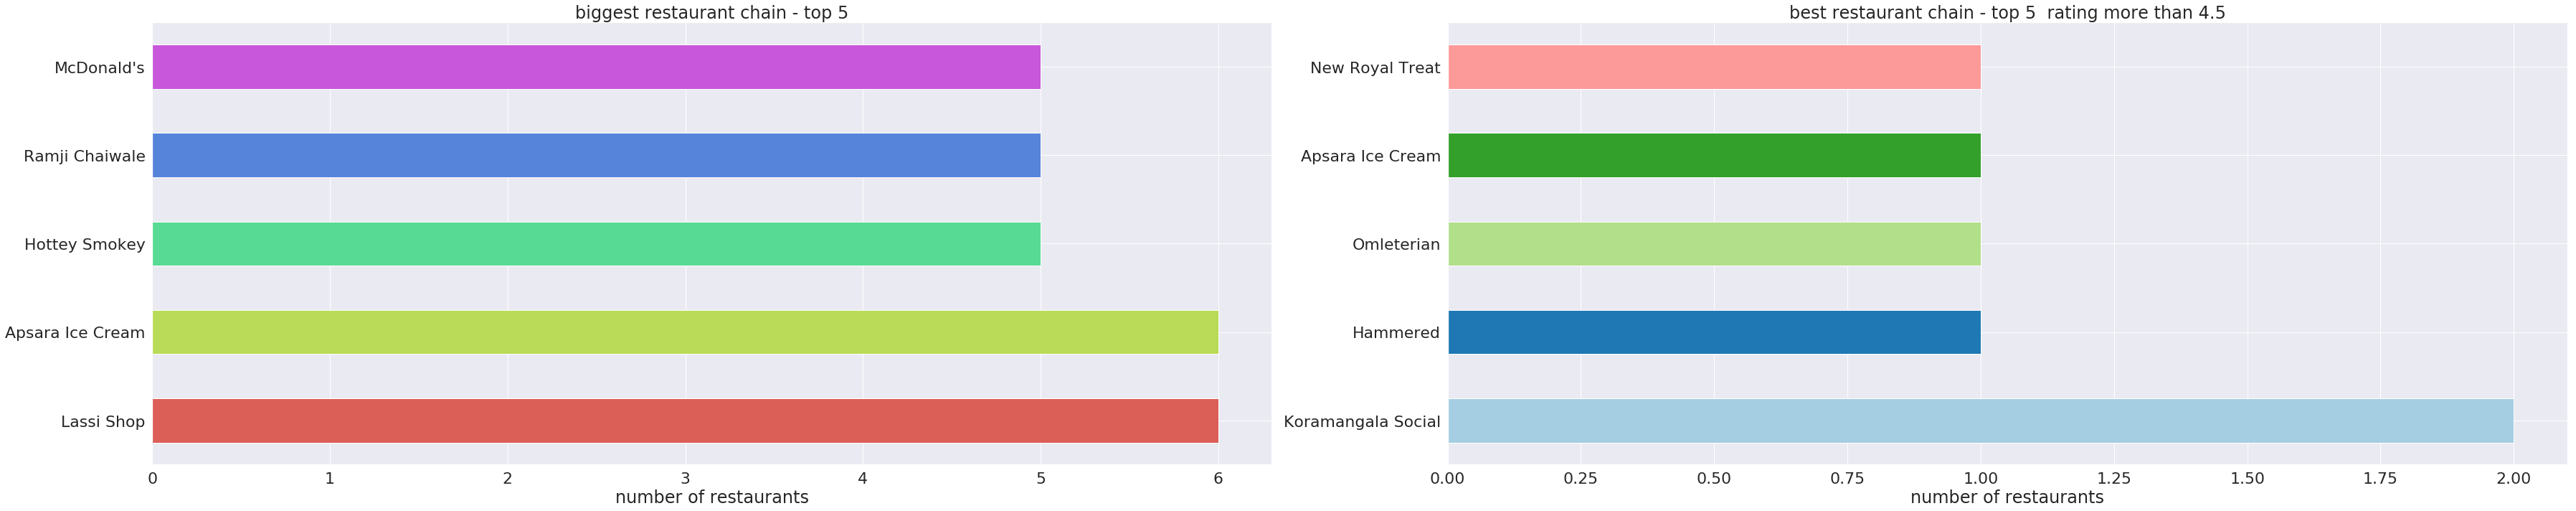

In [319]:
plt.rcParams['figure.figsize'] = 50,10
plt.subplot(1,2,1)
rest_train.name.value_counts().head().plot(kind='barh',color = sns.color_palette('hls',5))
plt.xlabel("number of restaurants")
plt.title("biggest restaurant chain - top 5")


plt.subplot(1,2,2)
rest_train[rest_train['rate'] > 4.5]['name'].value_counts().nlargest(5).plot(kind = 'barh',color = sns.color_palette("Paired"))
plt.xlabel("number of restaurants")
plt.title("best restaurant chain - top 5  rating more than 4.5")
plt.tight_layout()